# COGS 108 - Relations between Alcohol Consumption and Student Grades
https://drive.google.com/drive/folders/1tSTBNfeL-smEPu49H9CldLv0R2Gwnfj1?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [`X`] YES - make available
* [  ] NO - keep private

# Overview

Alcohol is often something students are exposed to at some point during their schooling, as they attend parties or hang out with friends outside of school. Our group was interested in looking at how a student's alcohol consumption could impact, either positively or negatively, their academic performance. We looked at the data from a survey of Portugese students including their reported alcohol consumption along with their grades per trimester, allowing us to see any relationship between these variables. After analyzing and visualizing this data, our results demonstrated a significant difference in average grades among students of different alcohol consumption levels, with the overall trend of average grades dropping as both weekday and weekend alcohol consumption levels increased.

# Names

- Brandon Chaing
- Gordon Chiu
- Nicholas Wong
- Jaskaranpal Singh
- Diego Alfaro

<a id='research_question'></a>
# Research Question

*Does alcohol consumption correlate with high school grades?*

<a id='background'></a>

## Background & Prior Work

Although the impact of various factors on one's success in college and the workplace has been studied quite extensively, the impact of alcohol consumption and how it can affect students and workers alike is a topic that seems to be significanty less studied. 

The few studies that have been done that are related to this topic do seem to indicate that heavy alcohol consumption among graduating seniors led to a significantly reduced chance for that senior to find employment upon graduation [4]. This establishes the negative correlation between alcohol consumption and success in school. This also prompts the question of whether alcohol consumption will have negative effects later on in one's career as well. 

A Penn State University study also revealed the negative impact that heavy alcohol consumption had among student GPAs. The study revealed that on average, students who abused alcohol more frequently had lower GPAs than those students who did not abuse alcohol as frequently [2]. 

Having established the negative impact that heavy alcohol consumption has on students, we are aiming to find a similar impact, if it exists, between heavy alcohol consumption and one's success in their career. We will analyze the drinking habits of people in the workplace and attempt to find a correlation between said drinking habits, and the success of the people they belong to. We will measure "success" in a variety of ways including by measuring respondents satisfaction and income, among other variables. 

References (include links):
- 1) https://pubmed.ncbi.nlm.nih.gov/8498620/
- 2) https://www.psu.edu/news/student-affairs/story/study-inverse-relationship-between-alcohol-abuse-and-college-gpa/
- 3) https://www.statista.com/statistics/354265/current-binge-heavy-alcohol-use-among-persons-in-the-us-by-age/
- 4) Bamberger, Peter A et al. “Does college alcohol consumption impact employment upon graduation? Findings from a prospective study.” The Journal of applied psychology vol. 103,1 (2018): 111-121. doi:10.1037/apl0000244

# Hypothesis


We believe that alcohol consumption adversely affects success of pre-college students.

# Dataset(s)

- Dataset Name: Student Alcohol Consumption 
- Link to the dataset: https://www.kaggle.com/uciml/student-alcohol-consumption/code 
- Number of observations: 649 

This dataset was taken from Kaggle. The data was collected primarily be Portugese researchers and the dataset was aggregated by UCI. The dataset contains information about students attending two secondary schools in Portgual. Data regarding the students personal lives was collected. This includes information about the students weekly alcohol consumption, their grades recieved over the course of the school year, and their parents educational levels.

We specifically chose to use only student-por.csv (with grades in Portuguese class), excluding student-math.csv (with grades in math class), because the subsets are uneven. Most students represented in the math set are also in the Portuguese set, but the reverse is not true; it didn't make sense to evaluate performance in two classes for only half the students.

# Setup

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

data = pd.read_csv('student-por.csv')

# Data Cleaning

First, we excluded any columns without information on either alcohol consumption or class grades. Below are explanations for each column:

* 'Dalc' - weekday alcohol consumption, as an integer on a relative scale from 1 (very low) to 5 (very high)
* 'Walc' - weekend alcohol consumption, as an integer on a relative scale from 1 (very low) to 5 (very high)
* 'G1' - grade in Portuguese class* after the first trimester, as an integer from 0 to 20
* 'G2' - grade in Portuguese class* after the second trimester, as an integer from 0 to 20
* 'G3' - grade in Portuguese class* after the third trimester (i.e. the final grade), as an integer from 0 to 20


*This data was taken from Portugal, so "Portuguese class" should be taken as more of a language arts class akin to the English classes in the United States.

In [2]:
data = data[['Dalc', 'Walc', 'G1', 'G2', 'G3']]
data.head()

,Dalc,Walc,G1,G2,G3
0,1,1,0,11,11
1,1,1,9,11,11
2,2,3,12,13,12
3,1,1,14,14,14
4,1,2,11,13,13


Then, we checked to make sure there were no missing values; none were found, so there was no need to clean the data at this step.

In [3]:
data.isna().any()

Dalc    False
Walc    False
G1      False
G2      False
G3      False
dtype: bool

Then, we checked to see if we needed to further normalize the date; values for Dalc and Walc should only include integers from 1 to 5, whereas values for G1, G2, and G3 should only include integers from 0 to 20.

In [4]:
data[['Dalc', 'Walc']].apply(pd.Series.value_counts)

,Dalc,Walc
1,451,247
2,121,150
3,43,120
4,17,87
5,17,45


In [15]:
data[['G1', 'G2', 'G3']].apply(pd.Series.value_counts).fillna(0)

,G1,G2,G3
0,1.0,7.0,15.0
1,0.0,0.0,1.0
4,2.0,0.0,0.0
5,5.0,3.0,1.0
6,9.0,7.0,3.0
7,33.0,16.0,10.0
8,42.0,40.0,35.0
9,65.0,72.0,35.0
10,95.0,83.0,97.0
11,91.0,103.0,104.0


Here we can see the number of grades reported for each grade value and trimester. Some of the trimesters had no reported records for certain grade values resuling in them being displayed as NaN, so we converted these to 0.0 to visually indicate that there were no counts of the value for that trimester in the dataset.

All data appears as it should be, so no further steps are needed.

# Data Analysis & Results

First we'll start looking at the values for Dalc and Walc.

The following figure shows the distributions for reported values for both weekday and weekend alcohol consumption side-by-side.

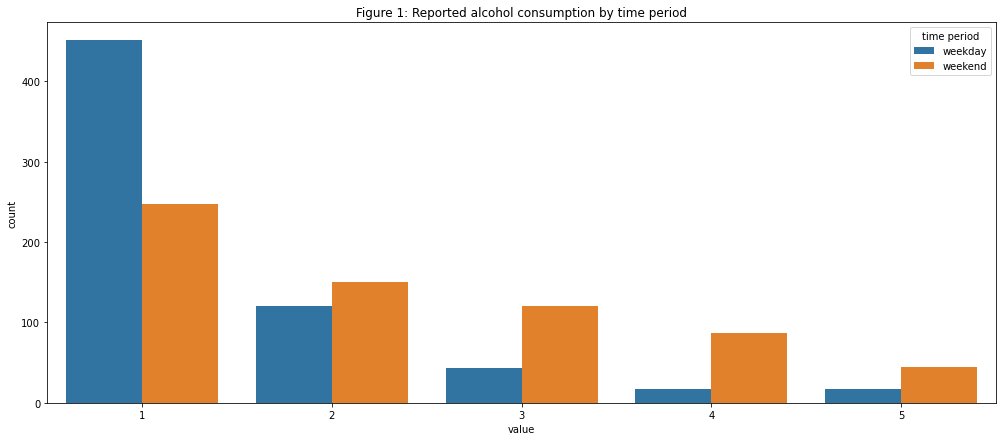

In [6]:
plt.rcParams['figure.figsize'] = (17, 7)
alc_counts = pd.melt(data[['Dalc', 'Walc']].rename(columns={'Dalc': 'weekday', 'Walc': 'weekend'}))

fig1 = sns.countplot(x='value', hue='time period', data=alc_counts.rename(columns={'variable': 'time period'})).set_title('Figure 1: Reported alcohol consumption by time period')

Figure 1 indicates a marked difference between the distributions of weekday and weekend alcohol consumption; most students only drink minimally (if at all) during the school week, but only half as much do so on the weekend. This may be of interest because, especially if Dalc and Walc are relatively independent of each other, one may end up a stronger predictor of school performance than the other.

To find out if the two variables are worth differentiating in further analysis, we'll look at the correlation between them.

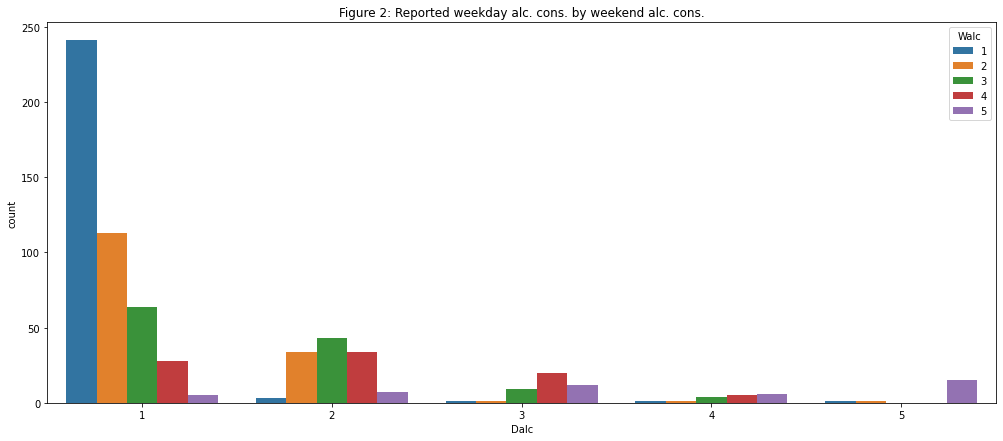

In [7]:
fig2 = sns.countplot(x='Dalc', hue='Walc', data=data).set_title('Figure 2: Reported weekday alc. cons. by weekend alc. cons.')

Unsurprisingly, Figure 2 shows that as weekday alcohol consumption goes up, so too does weekend alcohol consumption. However, the figure also shows enough variance for it to be worth using looking at both Dalc and Walc to answer our question.

Text(0.5, 1.0, 'Grades for third trimester')

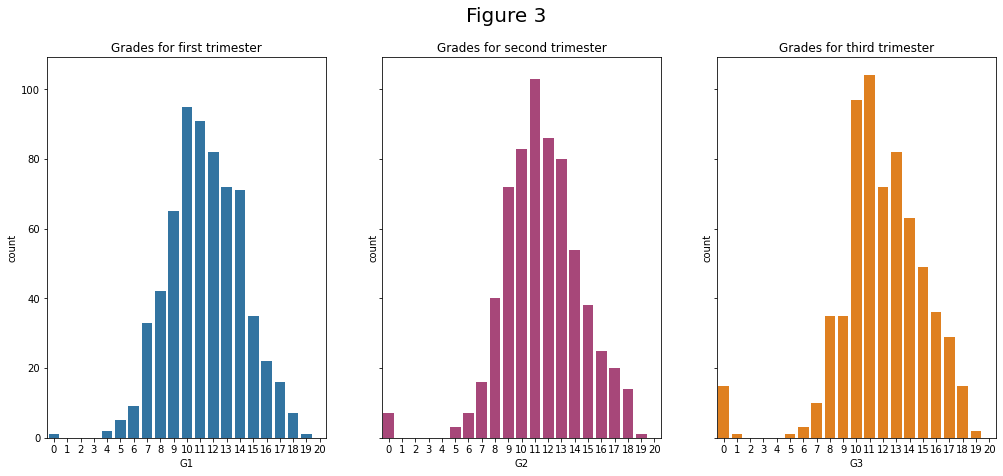

In [8]:
fig3, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
fig3.suptitle('Figure 3', fontsize=20)

ax1_color = sns.color_palette(palette=None, n_colors=1, desat=None)
ax2_color = sns.color_palette(palette="magma", n_colors=1, desat=None)
ax3_color = sns.color_palette(palette="autumn", n_colors=1, desat=None)

sns.countplot(x='G1', data=data, ax=ax1, order=range(21), palette=ax1_color).set_title('Grades for first trimester')
sns.countplot(x='G2', data=data, ax=ax2, order=range(21), palette=ax2_color).set_title('Grades for second trimester')
sns.countplot(x='G3', data=data, ax=ax3, order=range(21), palette=ax3_color).set_title('Grades for third trimester')

Next, Figure 3 graphs the distribution of grades for each trimester to see that it follows a normal distribution.

Text(0.5, 1.0, 'G3 vs. Alcohol Consumption')

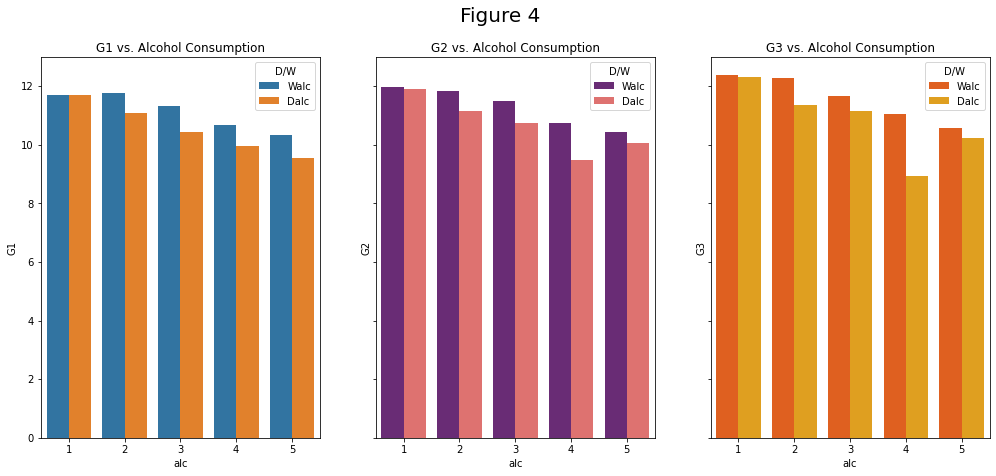

In [9]:
fig4, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
fig4.suptitle('Figure 4', fontsize=20)

#g1_mean
g1_mean_dalc = data.groupby(['Dalc'], as_index=False)['G1'].mean()
g1_mean_dalc['D/W'] = "Dalc"
g1_mean_dalc = g1_mean_dalc.rename(columns={'Dalc': 'alc'})

g1_mean_walc = data.groupby(['Walc'], as_index=False)['G1'].mean()
g1_mean_walc['D/W'] = "Walc"
g1_mean_walc = g1_mean_walc.rename(columns={'Walc': 'alc'})

g1_mean = pd.concat([g1_mean_walc,g1_mean_dalc])

sns.barplot(x='alc', y='G1', hue='D/W', data=g1_mean, palette=None, ax=ax1).set_title("G1 vs. Alcohol Consumption")

#g2_mean
g2_mean_dalc = data.groupby(['Dalc'], as_index=False)['G2'].mean()
g2_mean_dalc['D/W'] = "Dalc"
g2_mean_dalc = g2_mean_dalc.rename(columns={'Dalc': 'alc'})

g2_mean_walc = data.groupby(['Walc'], as_index=False)['G2'].mean()
g2_mean_walc['D/W'] = "Walc"
g2_mean_walc = g2_mean_walc.rename(columns={'Walc': 'alc'})

g2_mean = pd.concat([g2_mean_walc,g2_mean_dalc])

sns.barplot(x='alc', y='G2', hue='D/W', data=g2_mean, palette='magma', ax=ax2).set_title("G2 vs. Alcohol Consumption")

#g3_mean
g3_mean_dalc = data.groupby(['Dalc'], as_index=False)['G3'].mean()
g3_mean_dalc['D/W'] = "Dalc"
g3_mean_dalc = g3_mean_dalc.rename(columns={'Dalc': 'alc'})

g3_mean_walc = data.groupby(['Walc'], as_index=False)['G3'].mean()
g3_mean_walc['D/W'] = "Walc"
g3_mean_walc = g3_mean_walc.rename(columns={'Walc': 'alc'})

g3_mean = pd.concat([g3_mean_walc,g3_mean_dalc])

sns.barplot(x='alc', y='G3', hue='D/W', data=g3_mean, palette='autumn', ax=ax3).set_title("G3 vs. Alcohol Consumption")

Figure 4 illustrates the relationship between higher alcohol consumption and lower average grades. It also demonstrates that weekend alcohol consumption has less impact on grades than weekday alcohol consumption.

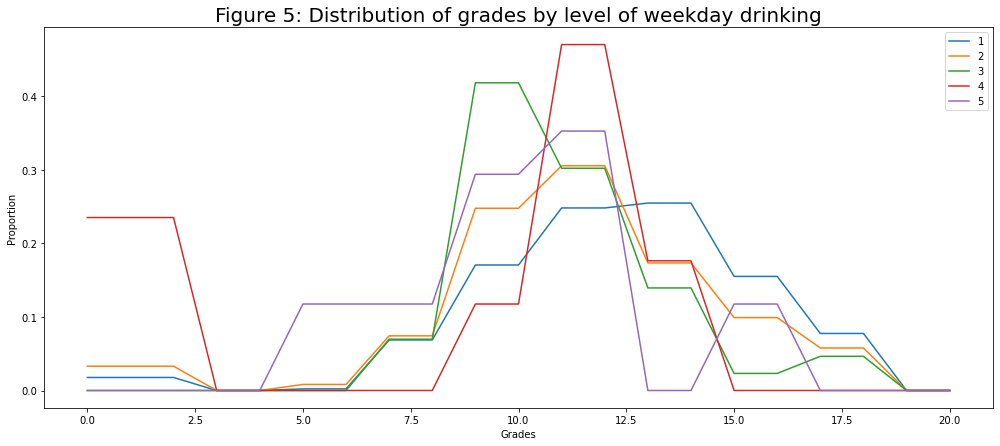

In [10]:
fig5 = plt.gcf()
x = range(21)
plt.plot(x, data[data['Dalc'] == 1]['G3'].value_counts(normalize=True, bins = range(0, 20, 2)).reindex(list(range(0,21)), fill_value=0), label="1")
plt.plot(x, data[data['Dalc'] == 2]['G3'].value_counts(normalize=True, bins = range(0, 20, 2)).reindex(list(range(0,21)), fill_value=0), label="2")
plt.plot(x, data[data['Dalc'] == 3]['G3'].value_counts(normalize=True, bins = range(0, 20, 2)).reindex(list(range(0,21)), fill_value=0), label="3")
plt.plot(x, data[data['Dalc'] == 4]['G3'].value_counts(normalize=True, bins = range(0, 20, 2)).reindex(list(range(0,21)), fill_value=0), label="4")
plt.plot(x, data[data['Dalc'] == 5]['G3'].value_counts(normalize=True, bins = range(0, 20, 2)).reindex(list(range(0,21)), fill_value=0), label="5")
plt.xlabel('Grades')
plt.ylabel('Proportion')
plt.legend(loc= 'upper right')
plt.title('Figure 5: Distribution of grades by level of weekday drinking', fontsize=20)
plt.show()

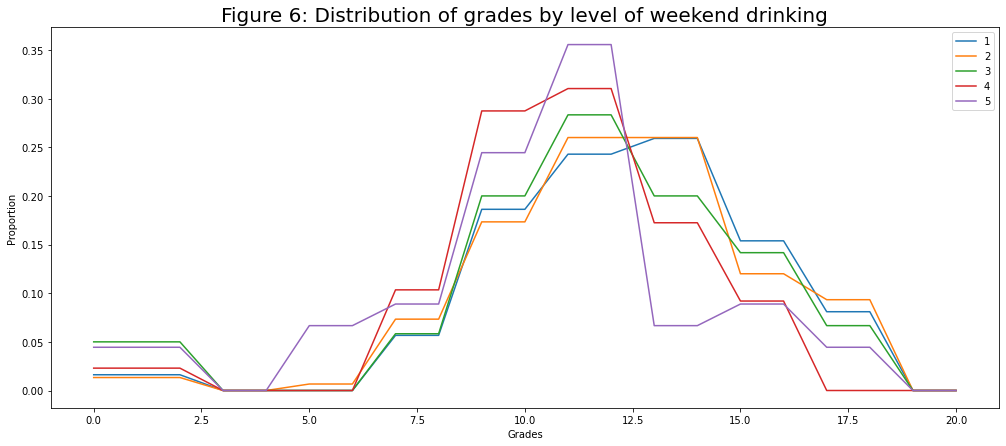

In [11]:
fig6 = plt.gcf()
x = range(21)
plt.plot(x, data[data['Walc'] == 1]['G3'].value_counts(normalize=True, bins = range(0, 20, 2)).reindex(list(range(0,21)), fill_value=0), label="1")
plt.plot(x, data[data['Walc'] == 2]['G3'].value_counts(normalize=True, bins = range(0, 20, 2)).reindex(list(range(0,21)), fill_value=0), label="2")
plt.plot(x, data[data['Walc'] == 3]['G3'].value_counts(normalize=True, bins = range(0, 20, 2)).reindex(list(range(0,21)), fill_value=0), label="3")
plt.plot(x, data[data['Walc'] == 4]['G3'].value_counts(normalize=True, bins = range(0, 20, 2)).reindex(list(range(0,21)), fill_value=0), label="4")
plt.plot(x, data[data['Walc'] == 5]['G3'].value_counts(normalize=True, bins = range(0, 20, 2)).reindex(list(range(0,21)), fill_value=0), label="5")
plt.xlabel('Grades')
plt.ylabel('Proportion')
plt.legend(loc= 'upper right')
plt.title('Figure 6: Distribution of grades by level of weekend drinking', fontsize=20)
plt.show()

Figure 5 shows the distribution of grades for each level of weekday alcohol consumption. The lines are sporadic, indicating that weekday drinking has more of an influence on grades, with lower levels of alcohol consumption shifting towards a higher gpa. Figure 6 shows the distribution of grades for each level of weekend alcohol consumption. The lines are more similarly distributed than in Figure 5, indicating a lower correlation between weekend drinking and gpa. 

Now, these graphs are a little messy (especially Figure 5), but with this we now know where else to look. This is because there appears to be a sort of "turning" point at approximately 12 on the x-axis, after which the lines corresponding to little to no drinking are above the other lines instead of below. We suspected this might have been related to the mean or median, so we took a look:

In [12]:
data.describe()

,Dalc,Walc,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,1.502311,2.280431,11.399076,11.570108,11.906009
std,0.924834,1.284380,2.745265,2.913639,3.230656
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,10.000000,10.000000,10.000000
50%,1.000000,2.000000,11.000000,11.000000,12.000000
75%,2.000000,3.000000,13.000000,13.000000,14.000000
max,5.000000,5.000000,19.000000,19.000000,19.000000


As it turns out, the median for G3 (the grade we care about) is 12, and the mean isn't far behind at ~11.9, so we decided to look at how drinking correlated with a grade at or above 12 to get a better idea of the trend.

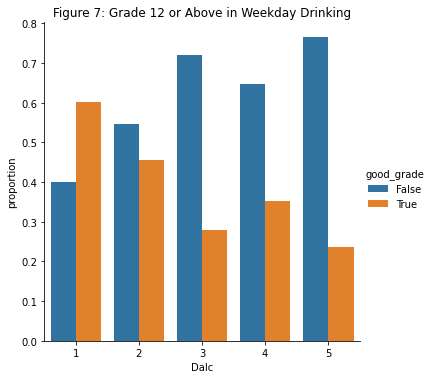

In [13]:
data_12 = data[['Dalc', 'Walc', 'G3']].rename(columns={'G3' : 'good_grade'})
data_12['good_grade'] = data_12['good_grade'].apply(lambda x: x >= 12)

x, y = 'Dalc', 'good_grade'
data_12_d = data_12.groupby(x)[y].value_counts(normalize=True).rename('proportion').reset_index()

fig7 = sns.catplot(x=x, y='proportion', hue=y, kind='bar', data=data_12_d).set(title='Figure 7: Grade 12 or Above in Weekday Drinking')

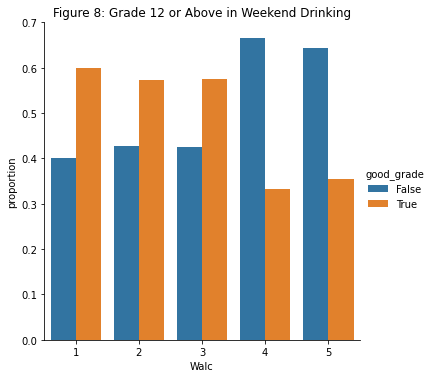

In [14]:
x = 'Walc'
data_12_w = data_12.groupby(x)[y].value_counts(normalize=True).rename('proportion').reset_index()

fig8 = sns.catplot(x=x, y='proportion', hue=y, kind='bar', data=data_12_w).set(title='Figure 8: Grade 12 or Above in Weekend Drinking')

With reference to Figures 7 and 8, the proportionality between those that perform above average and and below average change significantly as drinking increases. We can see in Figure 7 that those that drink during the week have a smaller proportion of students achieving grades that are above average. Figure 8 has similar results, however we can see that alcohol has less of an impact on the proportion as compared to to Figure 7; there are more students that performed above average at the drinking scale 2 and 3 than those that did below average unlike the weekday drinkers.

# Ethics & Privacy

This dataset was collected by survey suggesting that there was informed and voluntary consent for the data provided. The rows for columns were quantified in a way that is difficult for a specific person to be identified, since personally identified variables such as address were broadened to very general values such as "rural" and "urban" having a strong level of anonymity. The data has been widely publicized through websites such as Kaggle to be freely used in data analysis and has also been licensed under the Creative Commons Attribution 4.0 International License, which allows the sharing and adaptation of datasets, making the risk of breaching privacy in an unethical manner very low. If at any point we are aware that this dataset were to be removed or the license were revoked, the data analysis for this project will be removed. 

There is a very noticable bias in this dataset, since all of the observations were done only in Portugal, which could result in variability and lack of representation of students as a whole. To handle this issue data from other countries could be supplemented in the future to lower the chance of variability. Furthermore, since this data is obtained by survey, there is a lot of personal bias towards how an individual would scale alcohol consumption compared to someone else. With this in mind, only significant changes in data were identified and any very clear abnormalities in data were considered as difference in personal opinion and were not analyzed.  


# Conclusion & Discussion

The purpose of this report is to determine if alcohol consumption affects students’ performance. The dataset we used contains information about the grades and drinking habits of students at two schools in Portugal. The students’ grades were taken from their Portuguese class, where they were graded out of 20 for 3 trimesters. Their alcohol consumption was divided by weekday and weekend drinking and was placed on a scale from 1 to 5, with 5 being very high. Based on previous related research, we hypothesized that alcohol consumption would be negatively correlated with a student’s performance in school. After our analysis, we found that the data supported our hypothesis and that consumption of alcohol on the weekend lessened the effect.

Despite the dataset’s small population of students who consumed a significant amount of alcohol, our exploration of the dataset gives strong evidence that alcohol consumption is negatively correlated with a student’s success in school. This result is consistent with past research done in the area and supports our hypothesis. Particularly, students who consume any alcohol on weekdays were seen to perform worse than their abstaining peers. On the other hand, weekend alcohol consumption was less indicative of a student’s performance, only relating to below average grades in students who consumed a significant amount of alcohol.

As many previous studies on alcohol indicate, alcohol consumption is negatively correlated with performance. However, as we found in our analysis, weekend drinking seems less strongly associated with a decrease in performance than weekday drinking. For things that have a bad connotation in society like drinking, perhaps moderation and consumption during leisure time can allow people to still enjoy themselves without impacting their well being and performance.


# Team Contributions

- Brandon Chaing: Overview, Hypothesis, Research Question, and Did 2/3 EDA Coding
- Gordon Chiu: Ethics and Privacy, References, and Helped with EDA 
- Nicholas Wong: Conclusion and Discussion, Dataset, and Helped with EDA 
- Jaskaranpal Singh: Video, Dataset, and Helped with EDA 
- Diego Alfaro: Data Cleaning + Background + 1/3 EDA Coding 